In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from decimal import Decimal
import datetime
import folium #Longitude and Lattitude mapping.


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error 

#Import machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
from itertools import *
import os
import folium
from folium import plugins
from folium.plugins import MarkerCluster #To be able to cluster our individual data points on folium.
from IPython.display import HTML, display

In [2]:
calendar = pd.read_csv('seattle_calendar.csv')
detail_listing = pd.read_csv('seattle_listings.csv') #detailed listings
detail_reviews = pd.read_csv('seattle_reviews.csv') #detailed reviews


In [3]:
detail_listing.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20201025051148,2020-10-25,Casa Madrona - Urban Oasis 1 block from the park!,"Gorgeous, architect remodeled, Dutch Colonial ...",Madrona is a hidden gem of a neighborhood. It ...,https://a0.muscache.com/pictures/02973ad3-a7a3...,2536,https://www.airbnb.com/users/show/2536,...,10.0,10.0,10.0,STR-OPLI-19-002837,f,2,2,0,0,0.22
1,9419,https://www.airbnb.com/rooms/9419,20201025051148,2020-10-25,Glorious sun room w/ memory foambed,"Keeping you safe is our priority, we are adher...","Lots of restaurants (see our guide book) bars,...",https://a0.muscache.com/pictures/56645186/e5fb...,30559,https://www.airbnb.com/users/show/30559,...,10.0,10.0,10.0,str-opli-19-003039,f,8,0,8,0,1.19
2,9531,https://www.airbnb.com/rooms/9531,20201025051148,2020-10-25,The Adorable Sweet Orange Craftsman,The Sweet Orange is a delightful and spacious ...,The neighborhood is awesome! Just far enough ...,https://a0.muscache.com/pictures/30470355/052c...,31481,https://www.airbnb.com/users/show/31481,...,10.0,10.0,10.0,STR-OPLI-19-002182,f,2,2,0,0,0.37
3,9534,https://www.airbnb.com/rooms/9534,20201025051148,2020-10-25,The Coolest Tangerine Dream MIL!,Welcome to my delicious Tangerine Dream! A co...,The neighborhood is the best of two worlds...w...,https://a0.muscache.com/pictures/30476721/0751...,31481,https://www.airbnb.com/users/show/31481,...,10.0,10.0,10.0,STR-OPLI-19-002182,f,2,2,0,0,0.50
4,9596,https://www.airbnb.com/rooms/9596,20201025051148,2020-10-25,"the down home , spacious, central and fab!","We are in a great neighborhood, quiet, full of...","if you arrive early for check in at 3, I reco...",https://a0.muscache.com/pictures/665252/102d18...,14942,https://www.airbnb.com/users/show/14942,...,9.0,10.0,9.0,STR-OPLI-19-002622,f,2,2,0,0,0.85


In [4]:
detail_listing.shape

(4335, 74)

In [5]:
detail_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2318,146,2008-09-15,2451,Kevin,1000 times better than staying at a hotel.
1,2318,126302712,2017-01-10,12332845,Jessica,"Our family (two couples, a two year old and an..."
2,2318,140977084,2017-04-01,4789466,Ivan,Top of the list locations we have stayed at! T...
3,2318,147262504,2017-04-25,55817131,Mike,"SUCH an awesome place. Very clean, quiet and s..."
4,2318,161806368,2017-06-18,113604590,Pete,We flew quite a distance to be at our only dau...


In [6]:
detail_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270875 entries, 0 to 270874
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     270875 non-null  int64 
 1   id             270875 non-null  int64 
 2   date           270875 non-null  object
 3   reviewer_id    270875 non-null  int64 
 4   reviewer_name  270875 non-null  object
 5   comments       270752 non-null  object
dtypes: int64(3), object(3)
memory usage: 12.4+ MB


In [7]:
detail_reviews['reviewer_id'].value_counts()#.loc[lambda x : x>10]

3308335      62
7448809      35
7759467      34
206203       33
15121499     31
             ..
18899883      1
51932074      1
132125605     1
58729379      1
84412417      1
Name: reviewer_id, Length: 242498, dtype: int64

In [8]:
detail_reviews.groupby('listing_id')['reviewer_id'].value_counts().loc[lambda x : x>5].sort_values(ascending=False)

listing_id  reviewer_id
7087957     3308335        40
25770686    7759467        32
3038772     7448809        28
5006092     26529641       26
7462250     306138241      22
                           ..
6087451     18484611        6
6166307     56130937        6
6214517     48569763        6
6245498     35279639        6
15159094    132159568       6
Name: reviewer_id, Length: 67, dtype: int64

In [11]:
#calendar.info()
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,22153582,2020-10-25,t,$144.00,$144.00,3,1125
1,22153582,2020-10-26,t,$141.00,$141.00,3,1125
2,22153582,2020-10-27,t,$149.00,$149.00,3,1125
3,22153582,2020-10-28,t,$96.00,$96.00,3,1125
4,22153582,2020-10-29,t,$102.00,$102.00,3,1125


In [12]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582275 entries, 0 to 1582274
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   listing_id      1582275 non-null  int64 
 1   date            1582275 non-null  object
 2   available       1582275 non-null  object
 3   price           1582275 non-null  object
 4   adjusted_price  1582275 non-null  object
 5   minimum_nights  1582275 non-null  int64 
 6   maximum_nights  1582275 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 84.5+ MB


Let's clean some data on calendar dataset

In [13]:
calendar.shape

(1582275, 7)

In [14]:
calendar[calendar['price'] > calendar['adjusted_price']]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
366,22160061,2020-10-25,f,$229.00,$183.00,1,1125
367,22160061,2020-10-26,f,$229.00,$183.00,1,1125
368,22160061,2020-10-27,t,$229.00,$183.00,1,1125
369,22160061,2020-10-28,t,$229.00,$206.00,1,1125
370,22160061,2020-10-29,t,$229.00,$218.00,2,1125
...,...,...,...,...,...,...,...
1566583,45635497,2020-10-28,t,$40.00,$36.00,1,13
1566584,45635497,2020-10-29,t,$40.00,$36.00,1,13
1566585,45635497,2020-10-30,f,$50.00,$45.00,2,13
1566586,45635497,2020-10-31,f,$50.00,$45.00,2,13


In [15]:
#convert date into date datatype
calendar['date'] = pd.to_datetime(calendar['date'])

#convert prices into numbers
calendar['price'] = pd.to_numeric(calendar['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')
calendar['adjusted_price'] = pd.to_numeric(calendar['adjusted_price'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')

#convert available into boolean
d = {'t': True, 'f': False}
calendar['available'] = calendar['available'].map(d)

In [16]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582275 entries, 0 to 1582274
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   listing_id      1582275 non-null  int64         
 1   date            1582275 non-null  datetime64[ns]
 2   available       1582275 non-null  bool          
 3   price           1582275 non-null  float64       
 4   adjusted_price  1582275 non-null  float64       
 5   minimum_nights  1582275 non-null  int64         
 6   maximum_nights  1582275 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3)
memory usage: 73.9 MB


In [17]:
calendar.tail()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
1582270,45700695,2021-10-20,True,74.0,74.0,30,365
1582271,45700695,2021-10-21,True,74.0,74.0,30,365
1582272,45700695,2021-10-22,True,74.0,74.0,30,365
1582273,45700695,2021-10-23,True,74.0,74.0,30,365
1582274,45700695,2021-10-24,True,74.0,74.0,30,365


In [18]:
#filter calendar minimum_nights for less than 28 days > short term rental
calendar[calendar['minimum_nights'] < 28]['listing_id'].unique().size

2803

In [19]:
short_term = (calendar[calendar['minimum_nights'] < 28]['listing_id'].unique().size)/7226
short_term

0.38790478826460006

In [20]:
calendar_test = calendar.groupby('listing_id')['date'].count().reset_index()
calendar_test

,listing_id,date
0,2318,365
1,9419,365
2,9531,365
3,9534,365
4,9596,365
...,...,...
4330,46036925,365
4331,46037073,365
4332,46037172,365
4333,46037518,365


In [21]:
calendar_test['date'].value_counts()

365    4335
Name: date, dtype: int64

There are 365 rows for each listing. 

In [22]:
#checking the available column... see how many non null
calendar_test = calendar.groupby('available')['price'].value_counts()
#calendar_test = calendar.groupby('available')['price'].count().reset_index()

calendar_test

available  price 
False      75.0      16712
           99.0      16342
           70.0      15746
           100.0     15639
           90.0      15374
                     ...  
True       6799.0        1
           7590.0        1
           7659.0        1
           7849.0        1
           7983.0        1
Name: price, Length: 2536, dtype: int64

In [23]:
calendar['available'].value_counts()/calendar.shape[0]

True     0.556587
False    0.443413
Name: available, dtype: float64

56% of the listings are marked available. Either the other 44% are booked or owners have taken it off the market?

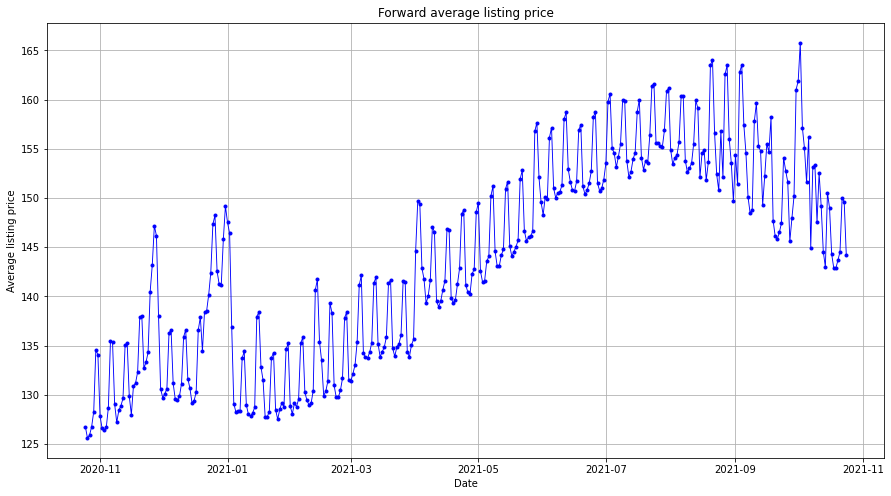

In [24]:
# Lets find out if there are a price trend for the upcoming year.
calendar1 = calendar.dropna()

#calendar_test_mean = calendar1[(calendar1['date'] > from_ts) & (calendar1['date'] < to_ts) & (calendar1['available'] == True)]
#calendar_test_mean = calendar1[(calendar1['available'] == True)]
calendar_test_mean = calendar1

# Taking average
calendar_test_mean = calendar_test_mean.groupby('date')['adjusted_price'].mean().reset_index()

# plot avg listings prices over time.
plt.figure(figsize=(15, 8))
plt.plot(calendar_test_mean.date, calendar_test_mean.adjusted_price, color='b', marker='.', linewidth=0.9)
plt.title("Forward average listing price")
plt.xlabel('Date')
plt.ylabel('Average listing price')
plt.grid()

What happen if we exclude those that are unavailable? 

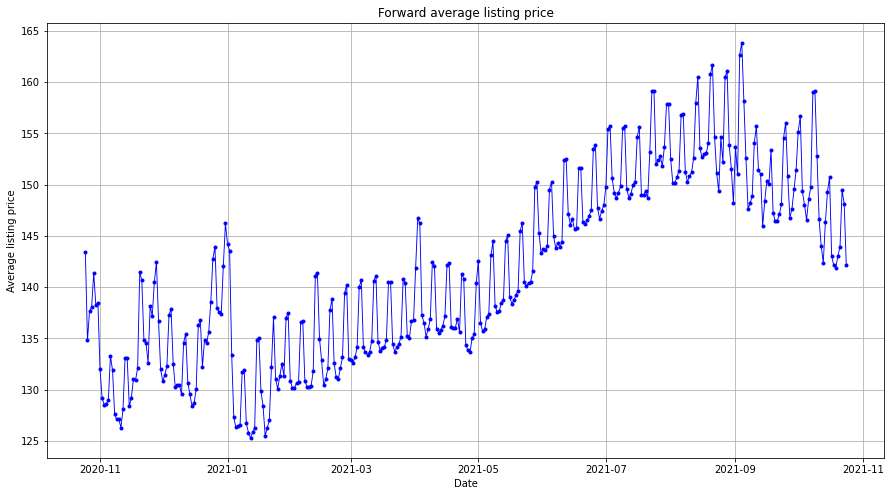

In [25]:
# Lets find out if there are a price trend for the upcoming year.
calendar1 = calendar.dropna()


calendar_test_mean = calendar1[(calendar1['available'] == True)]

# Taking average
calendar_test_mean = calendar_test_mean.groupby('date')['adjusted_price'].mean().reset_index()

# plot avg listings prices over time.
plt.figure(figsize=(15, 8))
plt.plot(calendar_test_mean.date, calendar_test_mean.adjusted_price, color='b', marker='.', linewidth=0.9)
plt.title("Forward average listing price")
plt.xlabel('Date')
plt.ylabel('Average listing price')
plt.grid()

what happened if i plot those that are unavailable? 

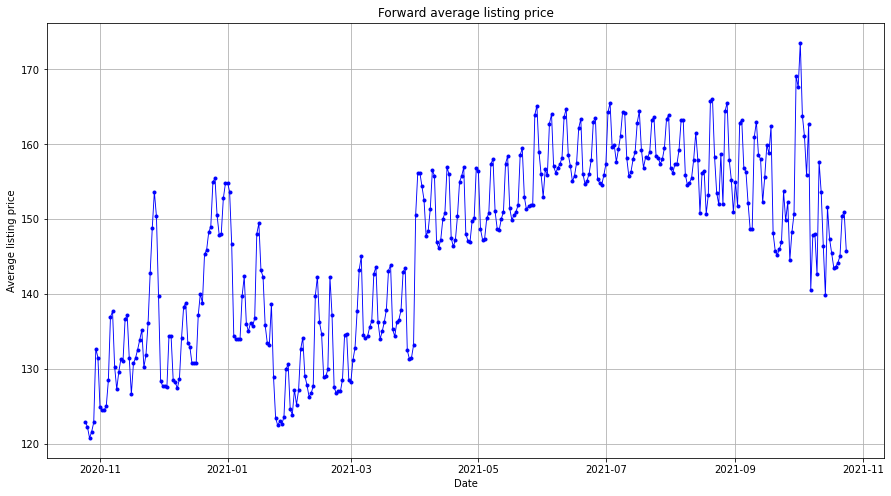

In [26]:
# Lets find out if there are a price trend for the upcoming year.
calendar1 = calendar.dropna()

calendar_test_mean = calendar1[(calendar1['available'] == False)]

# Taking average
calendar_test_mean = calendar_test_mean.groupby('date')['adjusted_price'].mean().reset_index()

# plot avg listings prices over time.
plt.figure(figsize=(15, 8))
plt.plot(calendar_test_mean.date, calendar_test_mean.adjusted_price, color='b', marker='.', linewidth=0.9)
plt.title("Forward average listing price")
plt.xlabel('Date')
plt.ylabel('Average listing price')
plt.grid()


Let's take a look at the listing data.

In [27]:
detail_listing.head(1)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20201025051148,2020-10-25,Casa Madrona - Urban Oasis 1 block from the park!,"Gorgeous, architect remodeled, Dutch Colonial ...",Madrona is a hidden gem of a neighborhood. It ...,https://a0.muscache.com/pictures/02973ad3-a7a3...,2536,https://www.airbnb.com/users/show/2536,...,10.0,10.0,10.0,STR-OPLI-19-002837,f,2,2,0,0,0.22


How many airbnb listings in Seattle? 

In [29]:
detail_listing.shape

(4335, 74)

In [30]:
detail_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4335 non-null   int64  
 1   listing_url                                   4335 non-null   object 
 2   scrape_id                                     4335 non-null   int64  
 3   last_scraped                                  4335 non-null   object 
 4   name                                          4335 non-null   object 
 5   description                                   4323 non-null   object 
 6   neighborhood_overview                         3045 non-null   object 
 7   picture_url                                   4335 non-null   object 
 8   host_id                                       4335 non-null   int64  
 9   host_url                                      4335 non-null   o

In [31]:
filtered_listing = detail_listing[['property_type', 'room_type', 'accommodates', 'neighbourhood_cleansed', 'review_scores_value', 'number_of_reviews', 
                                   'bedrooms', 'price', 'longitude', 'latitude']].copy()
#convert prices into numbers
filtered_listing['price'] = pd.to_numeric(filtered_listing['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')

filtered_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_type           4335 non-null   object 
 1   room_type               4335 non-null   object 
 2   accommodates            4335 non-null   int64  
 3   neighbourhood_cleansed  4335 non-null   object 
 4   review_scores_value     3462 non-null   float64
 5   number_of_reviews       4335 non-null   int64  
 6   bedrooms                3740 non-null   float64
 7   price                   4335 non-null   float64
 8   longitude               4335 non-null   float64
 9   latitude                4335 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 338.8+ KB


In [32]:
filtered_listing

,property_type,room_type,accommodates,neighbourhood_cleansed,review_scores_value,number_of_reviews,bedrooms,price,longitude,latitude
0,Entire house,Entire home/apt,9,Madrona,10.0,32,4.0,295.0,-122.29082,47.61082
1,Private room in apartment,Private room,2,Georgetown,10.0,148,1.0,55.0,-122.31937,47.55017
2,Entire house,Entire home/apt,4,Fairmount Park,10.0,40,2.0,155.0,-122.38474,47.55539
3,Entire guest suite,Entire home/apt,3,Fairmount Park,10.0,53,2.0,125.0,-122.38598,47.55624
4,Entire apartment,Entire home/apt,4,Wallingford,9.0,97,1.0,100.0,-122.33652,47.65479
...,...,...,...,...,...,...,...,...,...,...
4330,Private room in bungalow,Private room,2,Haller Lake,NaN,0,1.0,60.0,-122.32740,47.72012
4331,Private room in bungalow,Private room,2,Haller Lake,NaN,0,1.0,47.0,-122.32710,47.71834
4332,Private room in house,Private room,2,Haller Lake,NaN,0,1.0,75.0,-122.32734,47.71965
4333,Private room in bungalow,Private room,2,Haller Lake,NaN,0,1.0,59.0,-122.32804,47.71823


Do we have more apartment or room on airbnbn in Seattle?

In [33]:
filtered_listing['property_type'].value_counts()

Entire apartment                      1093
Entire house                           680
Private room in house                  517
Entire guest suite                     471
Entire serviced apartment              470
Entire condominium                     315
Entire guesthouse                      164
Entire townhouse                       159
Private room in townhouse               85
Entire loft                             43
Room in boutique hotel                  42
Private room in apartment               41
Private room in guest suite             38
Entire bungalow                         31
Entire cottage                          28
Shared room in house                    19
Private room in condominium             15
Room in serviced apartment              14
Private room in bungalow                13
Tiny house                              13
Private room in bed and breakfast       10
Room in aparthotel                      10
Private room in cottage                  5
Camper/RV  

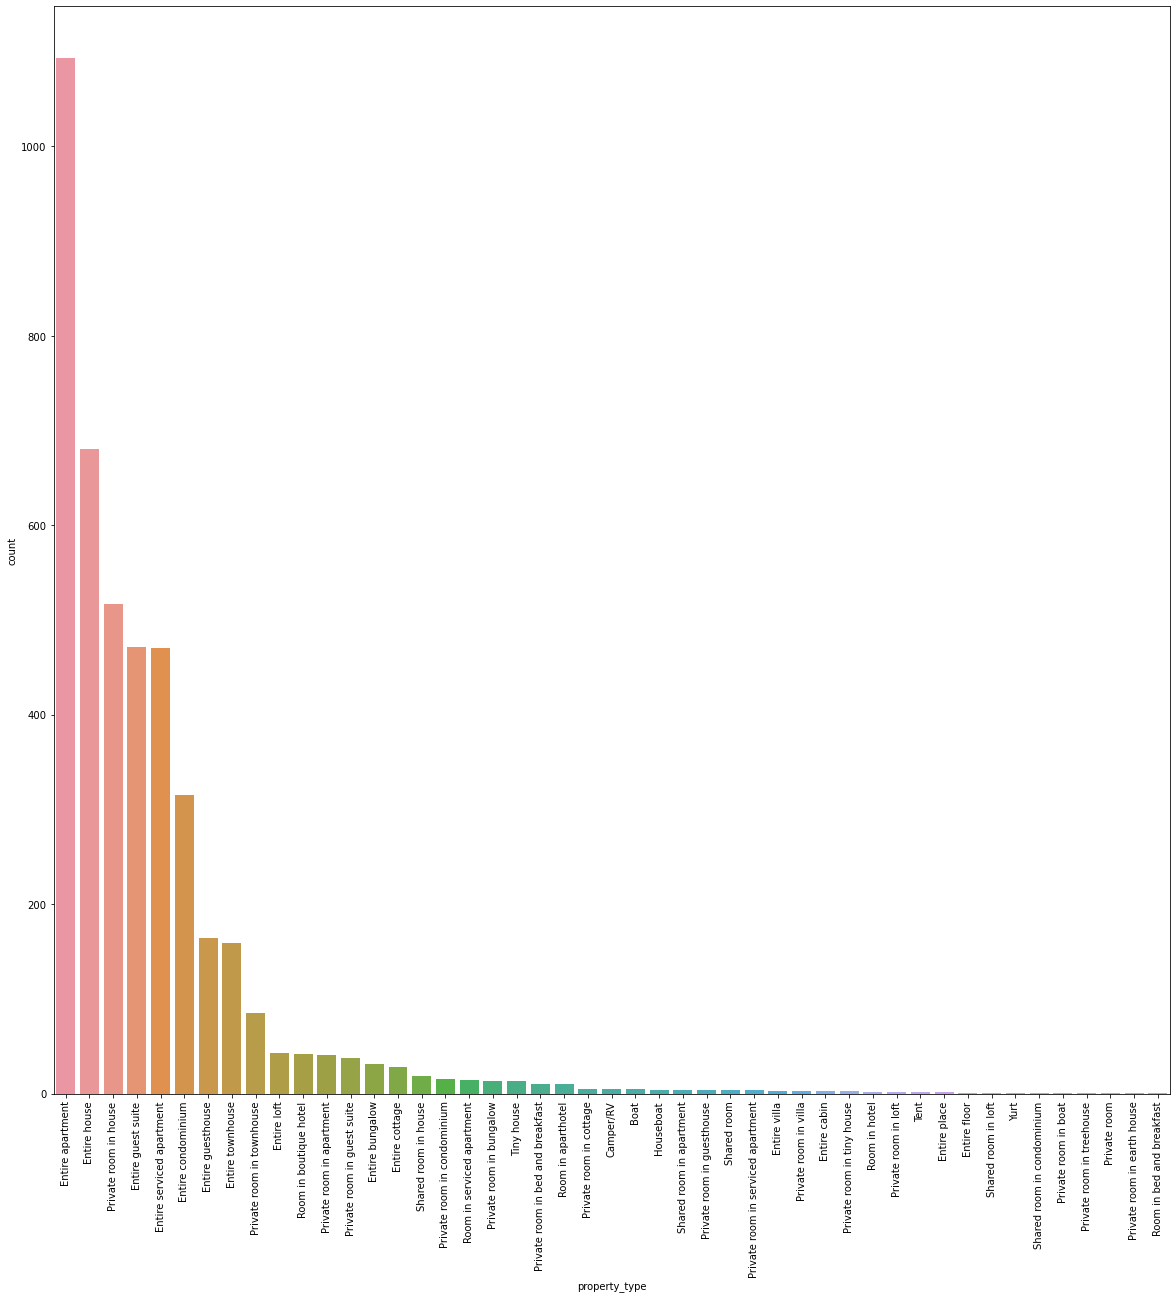

In [34]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.countplot(x=(filtered_listing)[('property_type')], order = filtered_listing['property_type'].value_counts().index)
plt.show()

Lets look at 'room_type'..

In [35]:
filtered_listing['room_type'].value_counts()

Entire home/apt    3504
Private room        787
Shared room          29
Hotel room           15
Name: room_type, dtype: int64

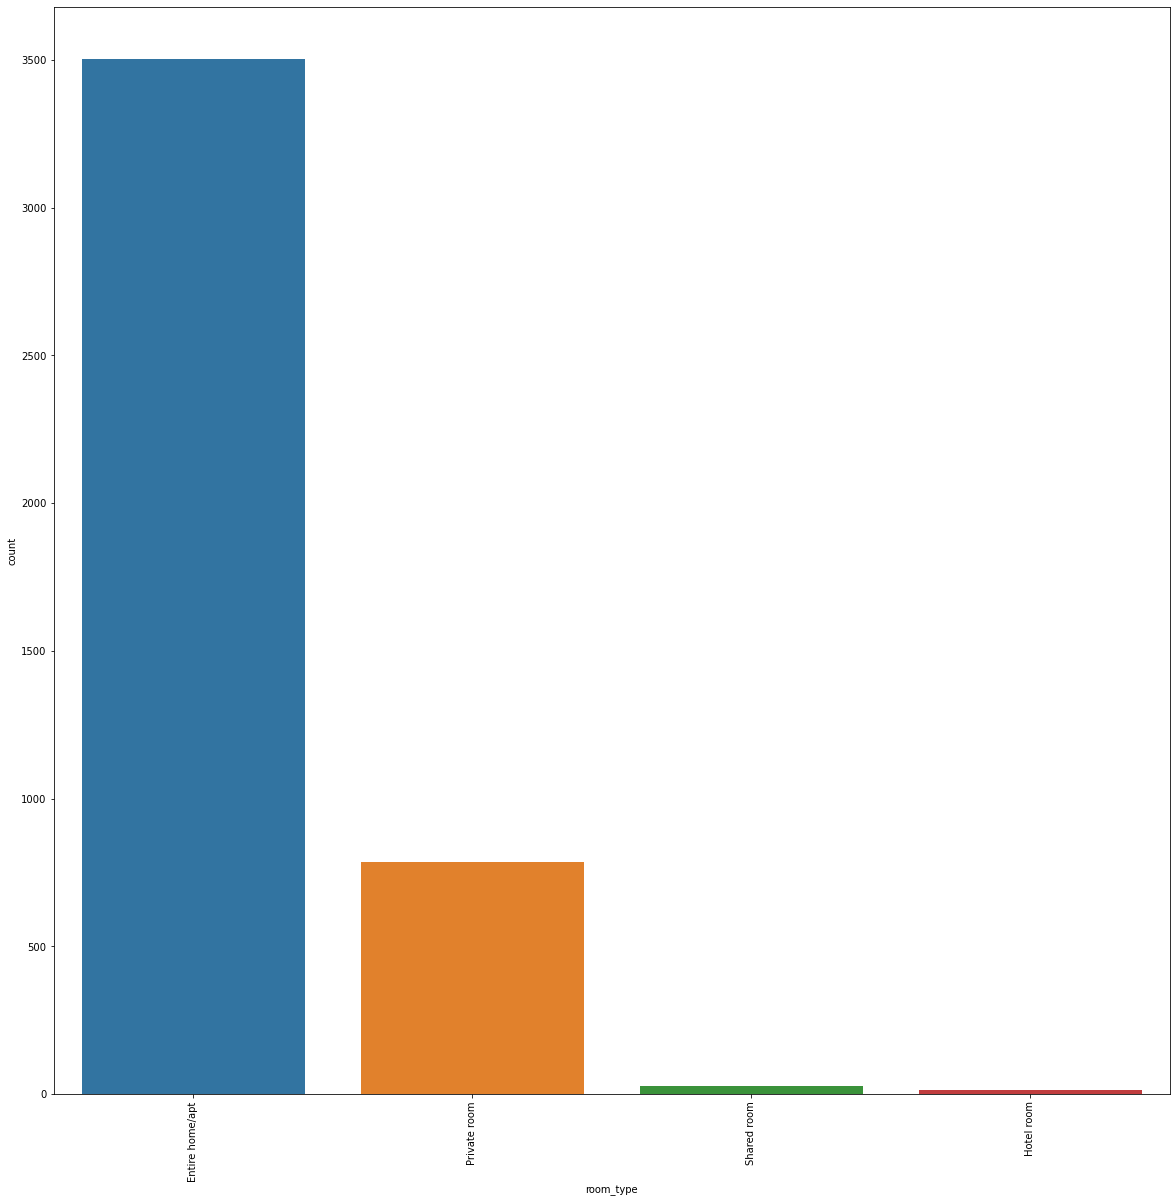

In [36]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.countplot(x=(filtered_listing)[('room_type')], order = filtered_listing['room_type'].value_counts().index)
plt.show()

In [37]:
(filtered_listing['neighbourhood_cleansed'].value_counts())/(filtered_listing['neighbourhood_cleansed'].count())

Belltown                     0.080738
Broadway                     0.056978
Central Business District    0.037832
Wallingford                  0.036217
First Hill                   0.030219
                               ...   
Briarcliff                   0.001845
View Ridge                   0.001615
South Park                   0.001153
Industrial District          0.000692
Holly Park                   0.000692
Name: neighbourhood_cleansed, Length: 88, dtype: float64

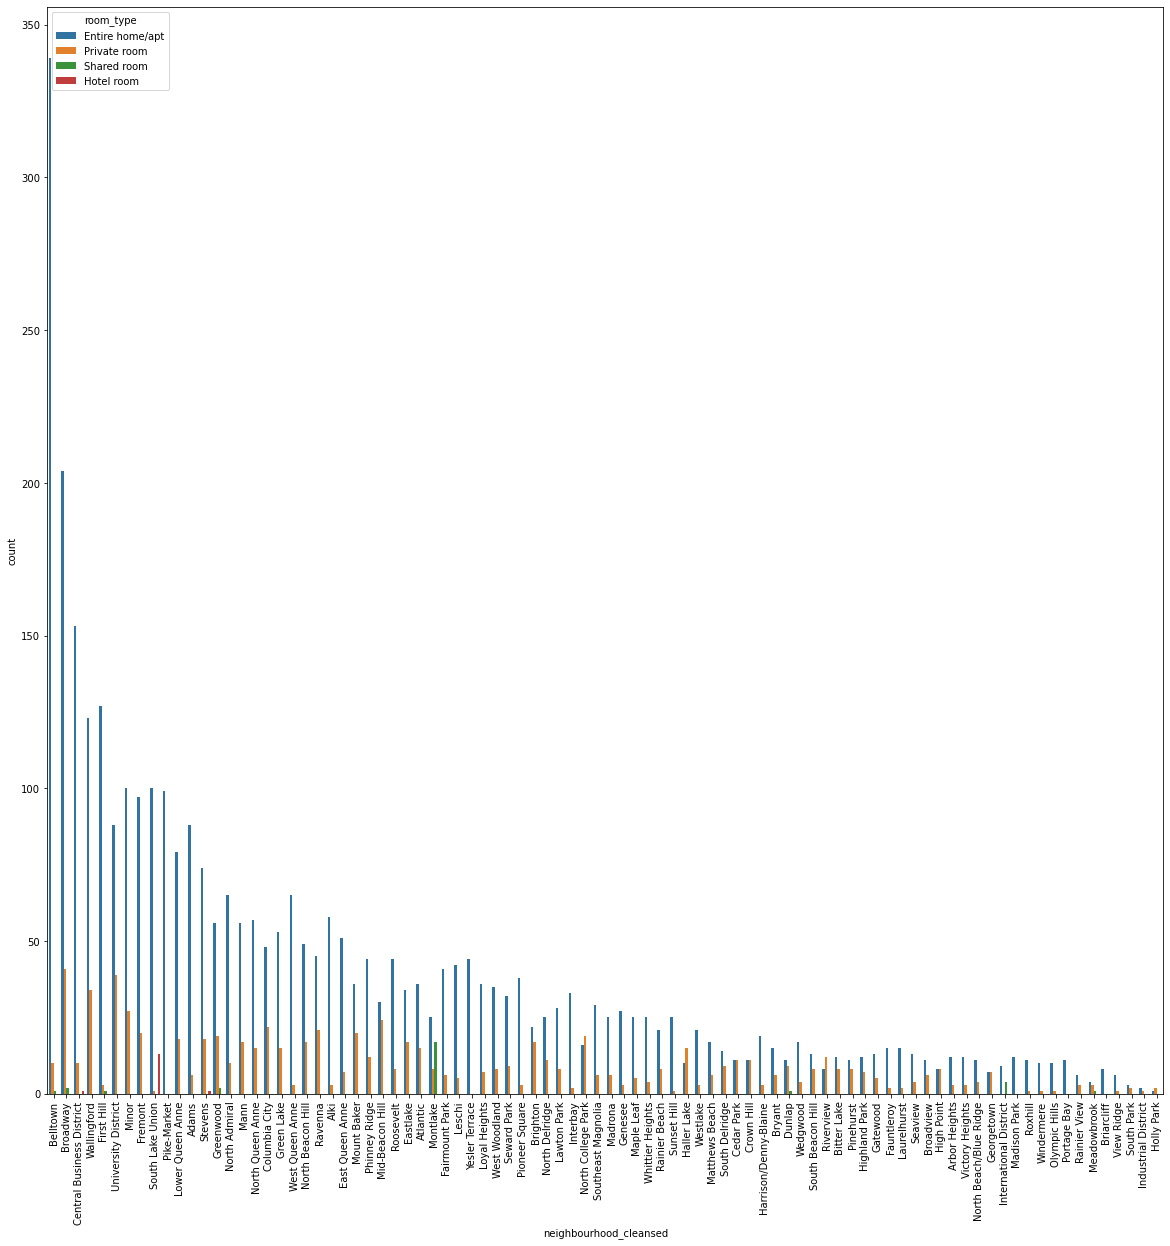

In [38]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.countplot(x=(filtered_listing)[('neighbourhood_cleansed')], hue= filtered_listing['room_type'], order = filtered_listing['neighbourhood_cleansed'].value_counts().index)
plt.show()



<AxesSubplot:xlabel='neighbourhood_cleansed'>

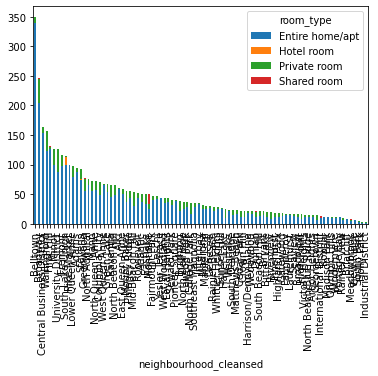

In [39]:
df_plot = filtered_listing.groupby(['room_type', 'neighbourhood_cleansed']).size().reset_index().pivot(columns='room_type', index='neighbourhood_cleansed', values=0)
df_plot = df_plot.fillna(0)

df_plot['total'] = df_plot['Private room'] + df_plot['Entire home/apt'] + df_plot['Shared room'] + df_plot['Hotel room']
df_plot = df_plot.sort_values(by=['total'], ascending = False).drop(['total'], axis=1)
df_plot.plot(kind='bar', stacked=True)
#df_plot

In [40]:
neighbourhood_count = filtered_listing.groupby('neighbourhood_cleansed').property_type.count().sort_values(ascending=False).reset_index()
neighbourhood_count

,neighbourhood_cleansed,property_type
0,Belltown,350
1,Broadway,247
2,Central Business District,164
3,Wallingford,157
4,First Hill,131
...,...,...
83,Briarcliff,8
84,View Ridge,7
85,South Park,5
86,Holly Park,3


array([[<AxesSubplot:title={'center':'accommodates'}>,
        <AxesSubplot:title={'center':'review_scores_value'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'latitude'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

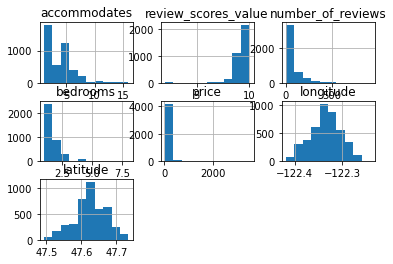

In [42]:
filtered_listing.hist()

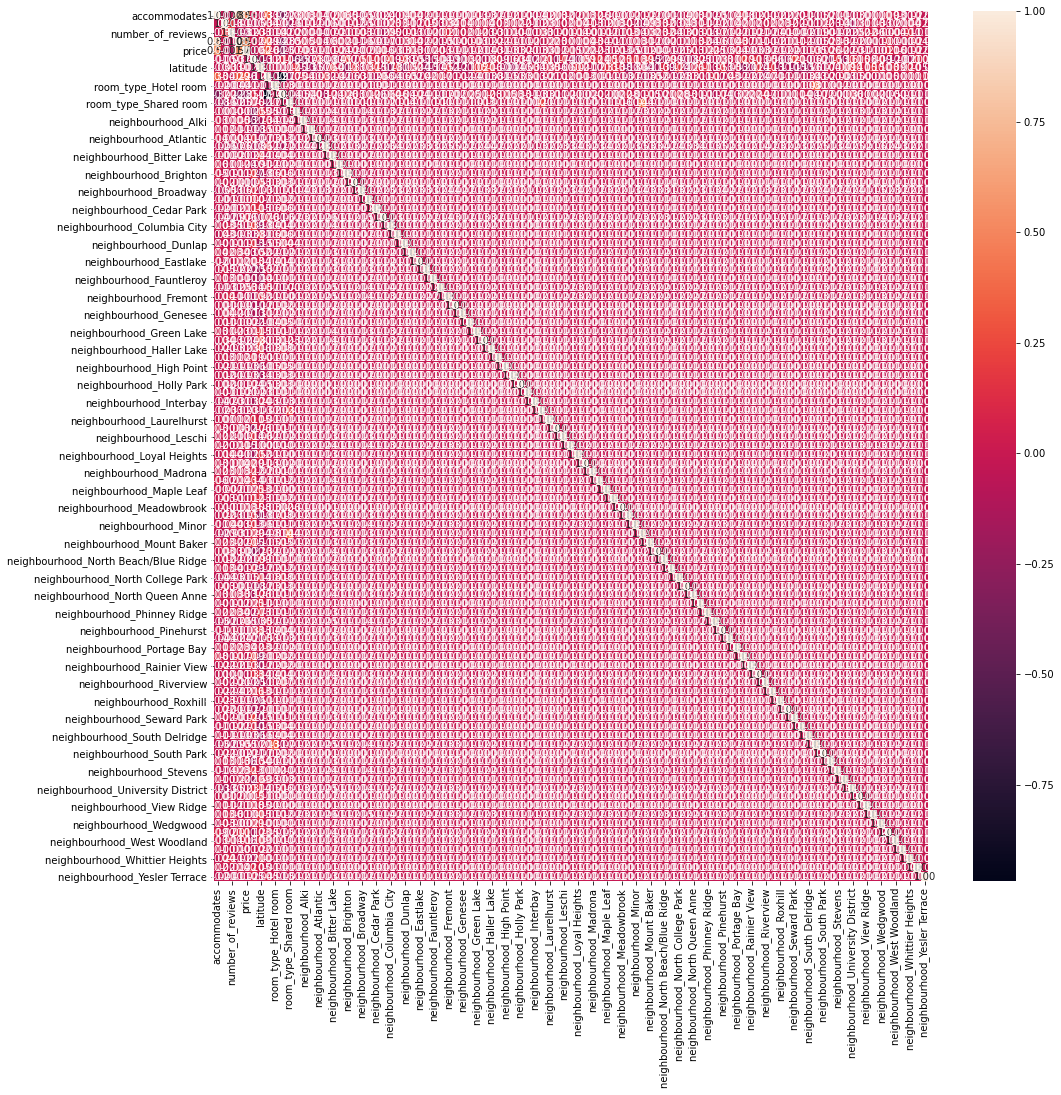

In [43]:
filtered_listing2 = pd.get_dummies(filtered_listing, columns=["room_type", "neighbourhood_cleansed"], prefix=["room_type", "neighbourhood"])

plt.figure(figsize = (16,16))
sns.heatmap(filtered_listing2.corr(), annot=True, fmt=".2f");

In [45]:
test = filtered_listing.dropna()

test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3009 entries, 0 to 4256
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_type           3009 non-null   object 
 1   room_type               3009 non-null   object 
 2   accommodates            3009 non-null   int64  
 3   neighbourhood_cleansed  3009 non-null   object 
 4   review_scores_value     3009 non-null   float64
 5   number_of_reviews       3009 non-null   int64  
 6   bedrooms                3009 non-null   float64
 7   price                   3009 non-null   float64
 8   longitude               3009 non-null   float64
 9   latitude                3009 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 258.6+ KB


In [46]:
#Split into explanatory and response variables

X = test.drop(['price','property_type','room_type', 'neighbourhood_cleansed'], axis=1)
y = test['price']


#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict and score the model
y_train_preds = lm_model.predict(X_train) 
y_test_preds = lm_model.predict(X_test) 


train_score = r2_score(y_train,y_train_preds)
test_score = r2_score(y_test, y_test_preds)#r2_score

print('Linear Regression r2 score => train: %.3f, test: %.3f' % (
        train_score,
        test_score))


Linear Regression r2 score => train: 0.512, test: 0.424


In [47]:
filtered_listing2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 100 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   property_type                            4335 non-null   object 
 1   accommodates                             4335 non-null   int64  
 2   review_scores_value                      3462 non-null   float64
 3   number_of_reviews                        4335 non-null   int64  
 4   bedrooms                                 3740 non-null   float64
 5   price                                    4335 non-null   float64
 6   longitude                                4335 non-null   float64
 7   latitude                                 4335 non-null   float64
 8   room_type_Entire home/apt                4335 non-null   uint8  
 9   room_type_Hotel room                     4335 non-null   uint8  
 10  room_type_Private room                   4335 n

In [48]:
filtered_listing2['review_scores_value'] = filtered_listing2['review_scores_value'].fillna(0)
filtered_listing2['bedrooms'] = filtered_listing2['bedrooms'].fillna(0)

filtered_listing2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 100 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   property_type                            4335 non-null   object 
 1   accommodates                             4335 non-null   int64  
 2   review_scores_value                      4335 non-null   float64
 3   number_of_reviews                        4335 non-null   int64  
 4   bedrooms                                 4335 non-null   float64
 5   price                                    4335 non-null   float64
 6   longitude                                4335 non-null   float64
 7   latitude                                 4335 non-null   float64
 8   room_type_Entire home/apt                4335 non-null   uint8  
 9   room_type_Hotel room                     4335 non-null   uint8  
 10  room_type_Private room                   4335 n

In [49]:
#Split into explanatory and response variables

X = filtered_listing2.drop(['price','property_type'], axis=1)
y = filtered_listing2['price']


#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict and score the model
y_train_preds = lm_model.predict(X_train) 
y_test_preds = lm_model.predict(X_test) 


train_score = r2_score(y_train,y_train_preds)
test_score = r2_score(y_test, y_test_preds)#r2_score

print('Linear Regression r2 score => train: %.3f, test: %.3f' % (
        train_score,
        test_score))


Linear Regression r2 score => train: 0.391, test: 0.424


trying more variables....

In [66]:
filtered_listing_long = detail_listing[['price',
'bedrooms',
'host_is_superhost',
'host_listings_count',
'host_total_listings_count',
'neighbourhood_cleansed',
'latitude',
'longitude',
'room_type',
'accommodates',
'number_of_reviews',
'number_of_reviews_ltm',
'number_of_reviews_l30d',
'review_scores_rating',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value',
'instant_bookable',
#'calculated_host_listings_count',
#'calculated_host_listings_count_entire_homes',
#'calculated_host_listings_count_private_rooms',
#'calculated_host_listings_count_shared_rooms',
'reviews_per_month']].copy()



#convert prices into numbers
filtered_listing_long['price'] = pd.to_numeric(filtered_listing_long['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')

filtered_listing_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        4335 non-null   float64
 1   bedrooms                     3740 non-null   float64
 2   host_is_superhost            4327 non-null   object 
 3   host_listings_count          4327 non-null   float64
 4   host_total_listings_count    4327 non-null   float64
 5   latitude                     4335 non-null   float64
 6   longitude                    4335 non-null   float64
 7   accommodates                 4335 non-null   int64  
 8   number_of_reviews            4335 non-null   int64  
 9   number_of_reviews_ltm        4335 non-null   int64  
 10  number_of_reviews_l30d       4335 non-null   int64  
 11  review_scores_rating         3494 non-null   float64
 12  review_scores_accuracy       3462 non-null   float64
 13  review_scores_clea

In [67]:
filtered_listing_long = filtered_listing_long.dropna()

#filtered_listing_long = filtered_listing_long.fillna(0)

#convert available into boolean
filtered_listing_long['host_is_superhost'] = filtered_listing_long['host_is_superhost'].map(d)
filtered_listing_long['instant_bookable'] = filtered_listing_long['instant_bookable'].map(d)
filtered_listing_long = pd.get_dummies(filtered_listing_long, columns=["room_type", "neighbourhood_cleansed"], prefix=["room_type", "neighbourhood"])


filtered_listing_long.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3001 entries, 0 to 4256
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        3001 non-null   float64
 1   bedrooms                     3001 non-null   float64
 2   host_is_superhost            3001 non-null   bool   
 3   host_listings_count          3001 non-null   float64
 4   host_total_listings_count    3001 non-null   float64
 5   latitude                     3001 non-null   float64
 6   longitude                    3001 non-null   float64
 7   accommodates                 3001 non-null   int64  
 8   number_of_reviews            3001 non-null   int64  
 9   number_of_reviews_ltm        3001 non-null   int64  
 10  number_of_reviews_l30d       3001 non-null   int64  
 11  review_scores_rating         3001 non-null   float64
 12  review_scores_accuracy       3001 non-null   float64
 13  review_scores_clea

In [68]:
#Split into explanatory and response variables

X = filtered_listing_long.drop(['price'], axis=1)
y = filtered_listing_long['price']


#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict and score the model
y_train_preds = lm_model.predict(X_train) 
y_test_preds = lm_model.predict(X_test) 


train_score = r2_score(y_train,y_train_preds)
test_score = r2_score(y_test, y_test_preds)#r2_score

print('Linear Regression r2 score => train: %.3f, test: %.3f' % (
        train_score,
        test_score))

Linear Regression r2 score => train: 0.533, test: 0.464


In [63]:
coeff_pd = pd.DataFrame(lm_model.coef_,X_train.columns,columns=['Coefficient'])
coeff_pd

,Coefficient
bedrooms,6.578433e+01
host_is_superhost,7.418996e+00
host_listings_count,4.124181e+12
host_total_listings_count,-4.124181e+12
latitude,-4.248303e+02
...,...
neighbourhood_West Woodland,7.681341e+13
neighbourhood_Westlake,7.681341e+13
neighbourhood_Whittier Heights,7.681341e+13
neighbourhood_Windermere,7.681341e+13


In [64]:
#I will train Random Forest Regressor model
forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=42, 
                               n_jobs=-1)
forest.fit(X_train, y_train.squeeze())

#calculate scores for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

print('Random Forest MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

Random Forest MSE train: 828.589, test: 6032.825
Random Forest R^2 train: 0.937, test: 0.499
